In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dataset has 1470 observations with 35 variables.

In [4]:
df.shape

(1470, 35)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Out of the 35 variables, there exists one target variable 'Attrition' with possible outcomes Yes and No. The other 34 variables are independent variables.

### Checking for missing values

In [6]:
# to check the missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

So, we can see that there are no missing values in the dataset. 

### Checking outliers

In [7]:
# to check numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

To remove catgeorical columns like Education, EnvironmentSatisfaction, WorkLifeBalance from above num_cols

In [8]:
cols_to_be_removed = ['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
                      'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel']
num_cols_final = list (set(num_cols) - set(cols_to_be_removed))

In [9]:
num_cols_final

['EmployeeNumber',
 'YearsWithCurrManager',
 'HourlyRate',
 'MonthlyIncome',
 'DistanceFromHome',
 'EmployeeCount',
 'TrainingTimesLastYear',
 'MonthlyRate',
 'YearsSinceLastPromotion',
 'TotalWorkingYears',
 'StandardHours',
 'NumCompaniesWorked',
 'Age',
 'YearsInCurrentRole',
 'PercentSalaryHike',
 'YearsAtCompany',
 'DailyRate']

Creating boxplots to check for outliers for the above num variables

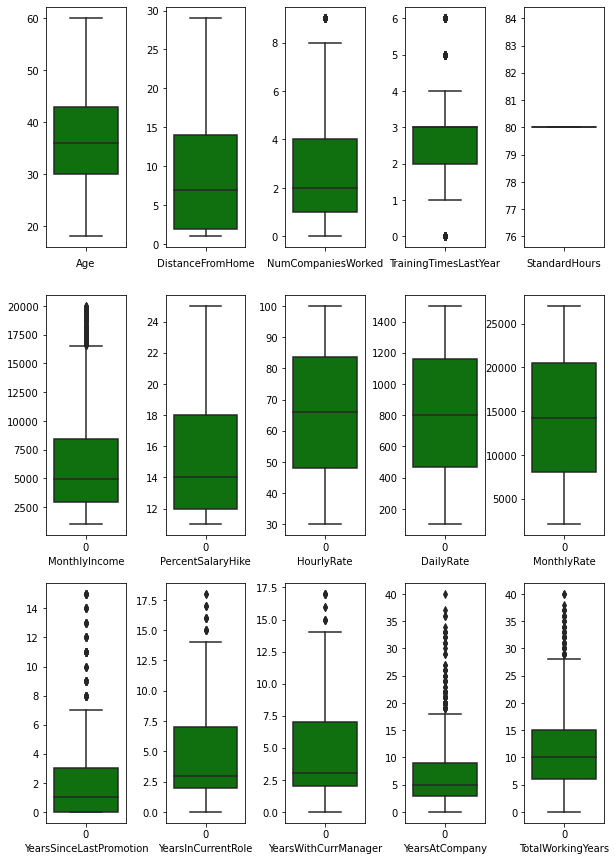

In [10]:
# initialize figure with 4 subplots in a row
fig, (ax1,ax2,ax3) = plt.subplots(3, 5, figsize=(10, 15))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['Age'], ax=ax1[0], color='g',)
ax1[0].set_xlabel('Age')

# draw boxplot for DistanceFromHome in the 2nd subplot
sns.boxplot(data=df['DistanceFromHome'], ax=ax1[1], color='g')
ax1[1].set_xlabel('DistanceFromHome')

# draw boxplot for NumCompaniesWorked in the 3rd subplot
sns.boxplot(data=df['NumCompaniesWorked'], ax=ax1[2], color='g')
ax1[2].set_xlabel('NumCompaniesWorked')

# draw boxplot for TrainingTimesLastYea in the 4th subplot
sns.boxplot(data=df['TrainingTimesLastYear'], ax=ax1[3], color='g')
ax1[3].set_xlabel('TrainingTimesLastYear')

# draw boxplot for StandardHours in the 5th subplot
sns.boxplot(data=df['StandardHours'], ax=ax1[4], color='g')
ax1[4].set_xlabel('StandardHours')



# draw boxplot for MonthlyIncome in the 1st subplot
sns.boxplot(data=df['MonthlyIncome'], ax=ax2[0], color='g')
ax2[0].set_xlabel('MonthlyIncome')

# draw boxplot for PercentSalaryHike in the 2nd subplot
sns.boxplot(data=df['PercentSalaryHike'], ax=ax2[1], color='g')
ax2[1].set_xlabel('PercentSalaryHike')

# draw boxplot for HourlyRate in the 3rd subplot
sns.boxplot(data=df['HourlyRate'], ax=ax2[2], color='g')
ax2[2].set_xlabel('HourlyRate')

# draw boxplot for DailyRate in the 4th subplot
sns.boxplot(data=df['DailyRate'], ax=ax2[3], color='g')
ax2[3].set_xlabel('DailyRate')

# draw boxplot for MonthlyRate in the 5th subplot
sns.boxplot(data=df['MonthlyRate'], ax=ax2[4], color='g')
ax2[4].set_xlabel('MonthlyRate')



# draw boxplot for YearsSinceLastPromotion in the 1st subplot
sns.boxplot(data=df['YearsSinceLastPromotion'], ax=ax3[0], color='g',)
ax3[0].set_xlabel('YearsSinceLastPromotion')

# draw boxplot for YearsInCurrentRole in the 2nd subplot
sns.boxplot(data=df['YearsInCurrentRole'], ax=ax3[1], color='g')
ax3[1].set_xlabel('YearsInCurrentRole')

# draw boxplot for YearsWithCurrManager in the 3rd subplot
sns.boxplot(data=df['YearsWithCurrManager'], ax=ax3[2], color='g')
ax3[2].set_xlabel('YearsWithCurrManager')

# draw boxplot for YearsAtCompany in the 4th subplot
sns.boxplot(data=df['YearsAtCompany'], ax=ax3[3], color='g')
ax3[3].set_xlabel('YearsAtCompany')

# draw boxplot for TotalWorkingYears in the 5th subplot
sns.boxplot(data=df['TotalWorkingYears'], ax=ax3[4], color='g')
ax3[4].set_xlabel('TotalWorkingYears')



# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax1:
    subplot.set_xticklabels([])
    
plt.show()

1. StandardHours don't have any variation. All the observations have same value.

2. Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyRate, DailyRate, PercentSalaryHike tend not to have any outliers.

3. NumCompaniesWorked, TrainingTimesLastYear, YearsWithCurrManager, YearsInCurrentRole have a moderate number of outliers.

4. MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion have large number of outliers.